<a href="https://colab.research.google.com/github/programacaodinamica/analise-dados/blob/master/notebooks/Extraindo_Tweets_com_Python_Atualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraindo Tweets com Python (versão antiga)

In [ ]:
from IPython.display import YouTubeVideo

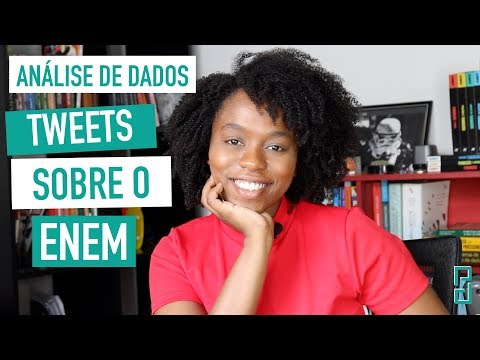

In [ ]:
display(YouTubeVideo('RssGfmtyn4A', width=550, height=310))

# Extraindo Tweets com Python (versão nova)

In [ ]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [ ]:
maxTweets = 100
i = 0
tweets_list = []
for tweet in sntwitter.TwitterSearchScraper(' since:2022-10-02 until:2022-10-07').get_items():
  if i > maxTweets:
    break
  tweets_list.append([tweet.date, tweet.url, tweet.username, tweet.content])
  i = i + 1


In [ ]:
tweets_df = pd.DataFrame(tweets_list, columns=['date', 'url','username', 'content' ])

In [ ]:
tweets_df.to_csv()

,date,url,username,content
0,2022-10-06 23:59:26+00:00,https://twitter.com/afroragga/status/157817311...,afroragga,"@felipeneto Agora sustentável, capitalismo e S..."
1,2022-10-06 23:59:08+00:00,https://twitter.com/LucasDi1111/status/1578173...,LucasDi1111,@JeanPie42823671 @Ticostacruz Isso! Ciro se jo...
2,2022-10-06 23:58:08+00:00,https://twitter.com/guinody/status/15781727880...,guinody,@ClarissaCotrim @leticiaiai Tá faltando voto? ...
3,2022-10-06 23:57:55+00:00,https://twitter.com/BailoHelena/status/1578172...,BailoHelena,@dudubrasil28 @SamPancher Eu votei na Simone T...
4,2022-10-06 23:57:28+00:00,https://twitter.com/RaimundoSousaF5/status/157...,RaimundoSousaF5,@GabrielBrotto1 @MFreireB_ @simonetebetbr Essa...
...,...,...,...,...
96,2022-10-06 23:14:42+00:00,https://twitter.com/WaldethA/status/1578161857...,WaldethA,@MauroAl91316763 Essa Simone Tebet nunca me en...
97,2022-10-06 23:13:08+00:00,https://twitter.com/rsvieiramoc/status/1578161...,rsvieiramoc,@jornalextra E o bolsomiliciano perguntando qu...
98,2022-10-06 23:12:28+00:00,https://twitter.com/BraulinoFrancis/status/157...,BraulinoFrancis,@revistaoeste Simone Tebet que é fazendeira va...
99,2022-10-06 23:11:55+00:00,https://twitter.com/viniciusbalzare/status/157...,viniciusbalzare,"Agora ta todo mundo amando a simone tebet, mas..."


In [ ]:
import csv
import nltk
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tweets_df

,date,url,username,content
0,2022-10-06 23:59:26+00:00,https://twitter.com/afroragga/status/157817311...,afroragga,"@felipeneto Agora sustentável, capitalismo e S..."
1,2022-10-06 23:59:08+00:00,https://twitter.com/LucasDi1111/status/1578173...,LucasDi1111,@JeanPie42823671 @Ticostacruz Isso! Ciro se jo...
2,2022-10-06 23:58:08+00:00,https://twitter.com/guinody/status/15781727880...,guinody,@ClarissaCotrim @leticiaiai Tá faltando voto? ...
3,2022-10-06 23:57:55+00:00,https://twitter.com/BailoHelena/status/1578172...,BailoHelena,@dudubrasil28 @SamPancher Eu votei na Simone T...
4,2022-10-06 23:57:28+00:00,https://twitter.com/RaimundoSousaF5/status/157...,RaimundoSousaF5,@GabrielBrotto1 @MFreireB_ @simonetebetbr Essa...
...,...,...,...,...
96,2022-10-06 23:14:42+00:00,https://twitter.com/WaldethA/status/1578161857...,WaldethA,@MauroAl91316763 Essa Simone Tebet nunca me en...
97,2022-10-06 23:13:08+00:00,https://twitter.com/rsvieiramoc/status/1578161...,rsvieiramoc,@jornalextra E o bolsomiliciano perguntando qu...
98,2022-10-06 23:12:28+00:00,https://twitter.com/BraulinoFrancis/status/157...,BraulinoFrancis,@revistaoeste Simone Tebet que é fazendeira va...
99,2022-10-06 23:11:55+00:00,https://twitter.com/viniciusbalzare/status/157...,viniciusbalzare,"Agora ta todo mundo amando a simone tebet, mas..."


In [ ]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words = stop_words + list([ ',','.','https', ':','!', '#', '@', '?', '/', 'O', 'vai', '|', '–','pra', 'a', 'e', '-'])

In [ ]:
# stop_words

In [ ]:
def remove_stopwords(x):
  word_tokens = nltk.word_tokenize(x)
  # print(word_tokens)
  filtered_sentence = ' '.join([w for w in word_tokens if not (w in stop_words or len(w)<4)]) 
  return filtered_sentence

In [ ]:
remove_stopwords('a conversa @ Monark , , Ciro reafirmou pretende')

'conversa Monark Ciro reafirmou pretende'

In [ ]:
tweets_df['filtered_text'] = tweets_df['content'].apply(lambda x: remove_stopwords(x))

In [ ]:
tweets_df['filtered_text']

0      felipeneto Agora sustentável capitalismo Simon...
1      JeanPie42823671 Ticostacruz Isso Ciro jogou Li...
2      ClarissaCotrim leticiaiai faltando voto Pede e...
3      dudubrasil28 SamPancher votei Simone Tebet que...
4      GabrielBrotto1 MFreireB_ simonetebetbr Essas p...
                             ...                        
96     MauroAl91316763 Essa Simone Tebet nunca engano...
97     jornalextra bolsomiliciano perguntando Simone ...
98     revistaoeste Simone Tebet fazendeira votar Lul...
99     Agora todo mundo amando simone tebet lembro 20...
100                                    2026 Simone Tebet
Name: filtered_text, Length: 101, dtype: object

In [ ]:
pd.Series(' '.join(tweets_df['filtered_text'].str.lower()).split()).value_counts()[:20]

tebet        103
simone       100
lula          43
bolsonaro     14
brasil        13
votar         12
ciro          12
voto          10
apoio          9
agora          6
turno          6
gomes          6
governo        6
eleições       6
pode           5
mulher         5
soraya         5
disse          5
segundo        5
política       5
dtype: int64